### Flame speed correlation
Equation 8.33 In Turns
$$S_L = S_{L,ref}\left(\frac{T_u}{T_{u,ref}}\right)^{\gamma}\left(\frac{P}{P_{ref}}\right)^{\beta}(1-2.1Y_{dil}).$$

$$T_{ref}=298\, K,$$
$$P_{ref}=1\, atm,$$

$$S_{L_ref} = B_M + B_2(\Phi-\Phi_M)^2,$$

$$\gamma = 2.18 - 0.8(\Phi - 1),$$

$$\beta = -0.16 + 0.22(\Phi-1),$$

where $B_M$, $B_2$, and $\Phi_M$ are constants for fuels: methanol, propane, isooctane, and gasoline. $Y_{dil}$ is the mass fraction of diluent in the air-fuel mixture (to account for, e.g., recirculated products.


In [6]:
def SL_corr(fuel, ϕ, P, Tu, Ydil) :
    
    Pref  = 1            # atm
    Turef = 298.15       # K
    
    ϕM   = {"methanol":1.11, "propane":1.08, "isooctane":1.13, "gasoline":1.13}
    BM   = {"methanol":36.92,"propane":34.22,"isooctane":26.32,"gasoline":27.58}         # cm/s
    B2   = {"methanol":-140.51,"propane":-138.64, "isooctane":-84.72, "gasoline":-78.34} # cm/s
    
    gamma = 2.18 - 0.8*(ϕ-1)
    beta = -0.16 + 0.22*(ϕ-1)
    SLref = BM[fuel] + B2[fuel]*(ϕ-ϕM[fuel])**2.0
    
    return SLref*(Tu/Turef)**gamma * (P/Pref)**beta * (1-2.1*Ydil)

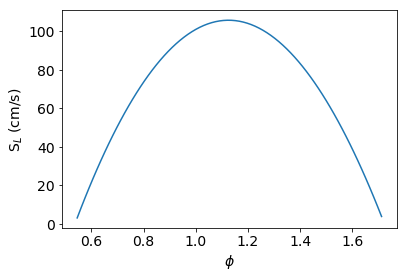

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fuel = "gasoline"
P    = 18.38        # atm
Tu   = 685.0        # K
Ydil = 0.0
ϕ  = np.linspace(0.5,2.0,100)

SL = SL_corr(fuel, ϕ, P, Tu, Ydil) 
igood = np.where(SL>0.0)
    
#print("S_L = %g cm/s" %(SL))

plt.rc('font', size=14)
plt.plot(phi[igood],SL[igood])
plt.xlabel(r'$\phi$')
plt.ylabel(r'S$_L$ (cm/s)');
